In [51]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [52]:
print("Num GPUs Available:",len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 1


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [54]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [55]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [56]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [57]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [58]:
# FE
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [59]:
# concatenate these variables with dataframe
X = X.drop(['Geography', 'Gender'], axis=1)

In [60]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [61]:
pd.concat([X, geography, gender], axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [62]:
# Splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#

In [63]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# fit_transform is used only in X_train in order to pervent the data leakage, because on X-train we make the model to learn the parameters to learn form the dataset like
# mean and std of dataset while training and transform in X_test means apply those learned pararameter to the dataset(apply the mean and std from the training data to scale the feature.)
# if in X_test then the model will indirectly sees the info from the test set while training thus DATA LEAKGE problem in metric evaluation and model performance.

In [64]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-1.19119591, -0.94312892, -1.031415  , ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.62420521, -0.08179119,  1.39076231, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-0.28401079,  0.87525072, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [65]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-1.31490297,  0.10961719, -1.031415  , ...,  0.64259497,
        -1.03227043,  0.49587037],
       [ 0.57162971,  0.30102557,  1.04473698, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [-0.00566991, -0.46460796, -0.33936434, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [-0.79945688, -0.84742473,  1.04473698, ...,  0.64259497,
        -1.03227043,  1.61255917]])

In [66]:
X_train.shape

(8000, 8)

In [67]:
# lets create ANN

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [69]:
# Lets initialise the ANN
classifier = Sequential()

In [70]:
# add the input layer
classifier.add(Dense(units=11, activation='relu'))

In [71]:
# adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))

In [72]:
# adding the second hidden input layer
classifier.add(Dense(units=6, activation='relu'))

In [73]:
# adding the ouput layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [74]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# bydefault adam uses learning rate of .01

In [75]:
# for manually setting the learning rate
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [76]:
# Early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [77]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6770 - loss: 0.6058 - val_accuracy: 0.7955 - val_loss: 0.4700
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7906 - loss: 0.4585 - val_accuracy: 0.7955 - val_loss: 0.4445
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7964 - loss: 0.4288 - val_accuracy: 0.8084 - val_loss: 0.4306
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8156 - loss: 0.4140 - val_accuracy: 0.8186 - val_loss: 0.4140
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8312 - loss: 0.4011 - val_accuracy: 0.8353 - val_loss: 0.3939
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8412 - loss: 0.3852 - val_accuracy: 0.8432 - val_loss: 0.3836
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8557 - loss: 0.3565 - val_accuracy: 0.8459 - val_loss: 0.3766
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8501 - loss: 0.3626 - 

In [78]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

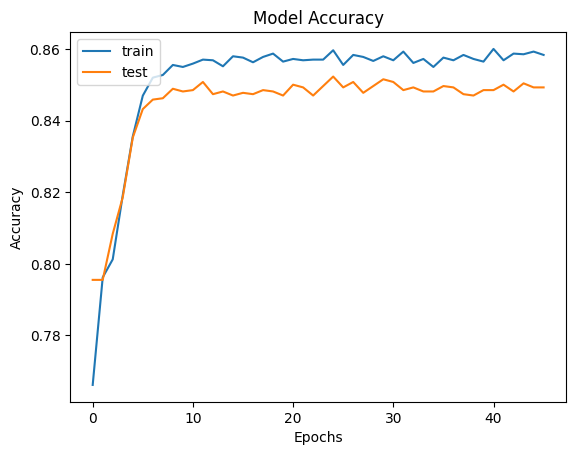

In [79]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

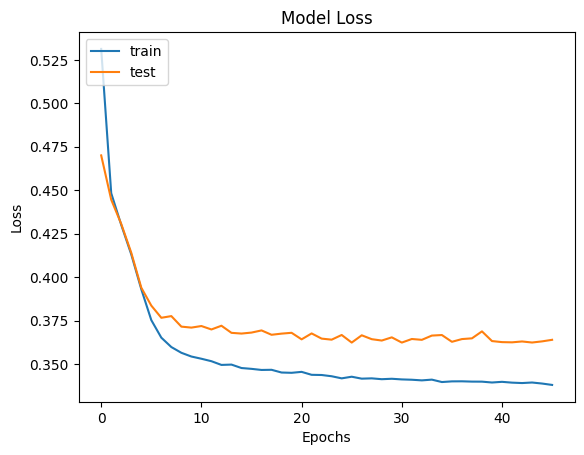

In [80]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','test'], loc = 'upper left')
plt.show()


In [82]:
# Part3 Making the predictions and evaluating the model
# Predict the test result set
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1512,   83],
       [ 211,  194]])

In [85]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.853

In [86]:
# get the weights
classifier.get_weights()

[array([[ 0.09193749, -0.42144138, -0.0711968 ,  0.05947387,  0.09285758,
          0.14496988, -0.14630364, -0.08676171, -0.08443537, -0.05084898,
         -0.02933037],
        [-0.26640555,  0.7484947 , -0.20622432,  0.39621383, -0.5658694 ,
          0.03196542, -0.424045  , -0.29251674,  0.01254751,  0.8947464 ,
          0.58009326],
        [-0.07459753, -0.2007263 , -0.02234778,  0.02764243, -0.10562707,
          0.23089856,  0.4465502 , -0.5253042 , -0.10456729, -0.09435096,
         -0.07002304],
        [-0.4066113 ,  0.43074122, -0.25483856, -0.8809241 , -0.2974122 ,
          0.11653966,  0.8409133 ,  0.35132846,  0.20531759,  0.18473747,
         -0.1342599 ],
        [-0.699974  , -0.11511476,  0.8643682 , -0.2854039 ,  0.31194675,
          0.23483083, -0.3886572 , -0.23193604,  1.0732931 ,  0.17893074,
         -0.00783031],
        [-0.4267743 , -0.29574338,  0.2847044 , -0.48162043, -0.28490353,
          0.35588127, -0.16730271,  0.7600103 , -0.03035917,  0.0205902

In [87]:
# Save model
classifier.save("churn_model.h5")

# Save scaler
import joblib
joblib.dump(sc, "sc.pkl")


['sc.pkl']

In [88]:
from google.colab import files
files.download("churn_model.h5")
files.download("sc.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>